# Data Analyzing and  Classfication for Shakespeare_data.csv

# Part 1: Data analyzing by Pandas

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Shakespeare_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111396 entries, 0 to 111395
Data columns (total 6 columns):
Dataline            111396 non-null int64
Play                111396 non-null object
PlayerLinenumber    111393 non-null float64
ActSceneLine        105153 non-null object
Player              111389 non-null object
PlayerLine          111396 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB


In [4]:
data['Player'].replace(np.nan, 'Unknown', inplace = True)
data.head(10)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,Unknown,ACT I
1,2,Henry IV,NaN,NaN,Unknown,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,Unknown,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil
8,9,Henry IV,1.0,1.1.6,KING HENRY IV,Shall daub her lips with her own children's bl...
9,10,Henry IV,1.0,1.1.7,KING HENRY IV,"Nor more shall trenching war channel her fields,"


## List the name of play

In [6]:
pd.DataFrame(data['Play'].unique().tolist(), columns=['Play'])

,Play
0,Henry IV
1,Henry VI Part 1
2,Henry VI Part 2
3,Henry VI Part 3
4,Alls well that ends well
5,As you like it
6,Antony and Cleopatra
7,A Comedy of Errors
8,Coriolanus
9,Cymbeline


## Count the players in each play

In [8]:
numberPlayers = data.groupby(['Play'])['Player'].nunique().sort_values(ascending= True).to_frame()


In [9]:
 numberPlayers

,Player
Play,
Two Gentlemen of Verona,18
Twelfth Night,19
The Tempest,20
A Comedy of Errors,21
Loves Labours Lost,21
Much Ado about nothing,24
Merchant of Venice,24
Merry Wives of Windsor,25
Alls well that ends well,26


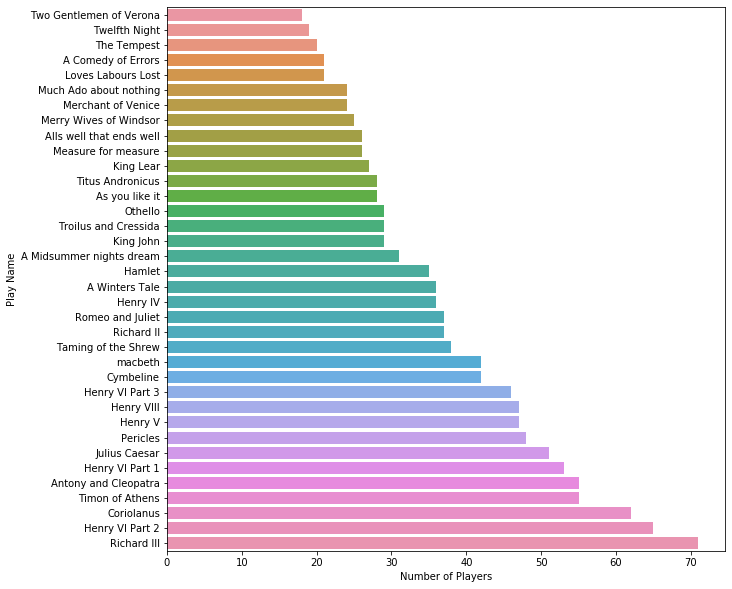

In [10]:
numberPlayers['Play'] = numberPlayers.index.tolist()
numberPlayers.columns = ['Num Players','Play']
numberPlayers.index= np.arange(0,len(numberPlayers))
numberPlayers

plt.figure(figsize=(10,10))
ax = sns.barplot(x='Num Players',y='Play',data=numberPlayers)
ax.set(xlabel='Number of Players', ylabel='Play Name')
plt.show()


In [11]:
data.groupby('Play').count()

,Dataline,PlayerLinenumber,ActSceneLine,Player,PlayerLine
Play,,,,,
A Comedy of Errors,2055,2055,1967,2055,2055
A Midsummer nights dream,2300,2300,2162,2300,2300
A Winters Tale,3489,3489,3364,3489,3489
Alls well that ends well,3083,3083,2925,3083,3083
Antony and Cleopatra,3862,3862,3565,3862,3862
As you like it,2822,2822,2677,2822,2822
Coriolanus,3992,3992,3768,3992,3992
Cymbeline,3958,3958,3757,3958,3958
Hamlet,4244,4244,4020,4244,4244


In [12]:
play_data = data.groupby('Play').count().sort_values(by='PlayerLine',ascending=False)['PlayerLine']
play_data = play_data.to_frame()
play_data['Play'] = play_data.index.tolist()
play_data.index = np.arange(0,len(play_data)) #changing the index from plays to numbers
play_data.columns =['Lines','Play']
play_data

,Lines,Play
0,4244,Hamlet
1,3992,Coriolanus
2,3958,Cymbeline
3,3941,Richard III
4,3862,Antony and Cleopatra
5,3766,King Lear
6,3762,Othello
7,3711,Troilus and Cressida
8,3489,A Winters Tale
9,3419,Henry VIII


In [13]:
data.groupby(['Play','Player']).count()['PlayerLine']

Play                      Player            
A Comedy of Errors        ADRIANA               284
                          AEGEON                150
                          AEMELIA                75
                          ANGELO                 99
                          ANTIPHOLUS              6
                          BALTHAZAR              31
                          Courtezan              43
                          DROMIO OF EPHESUS     191
                          DROMIO OF SYRACUSE    323
                          DUKE SOLINUS           97
                          First Merchant         19
                          Gaoler                  1
                          LUCE                   11
                          LUCIANA               118
                          OCTAVIUS CAESAR         3
                          OF EPHESUS            221
                          OF SYRACUSE           292
                          Officer                17
                   

In [14]:
lines_per_player= data.groupby(['Play','Player']).count()['PlayerLine']
lines_per_player= lines_per_player.to_frame()
lines_per_player

PlayerLine
Play                     Player                        
A Comedy of Errors       ADRIANA                    284
                         AEGEON                     150
                         AEMELIA                     75
                         ANGELO                      99
                         ANTIPHOLUS                   6
                         BALTHAZAR                   31
                         Courtezan                   43
                         DROMIO OF EPHESUS          191
                         DROMIO OF SYRACUSE         323
                         DUKE SOLINUS                97
                         First Merchant              19
                         Gaoler                       1
                         LUCE                        11
                         LUCIANA                    118
                         OCTAVIUS CAESAR              3
                         OF EPHESUS                 221
                         OF SYRACUSE                292
                         Officer                     17
                         PINCH                       17
                         Second Merchant             41
                         Servant                     16
A Midsummer nights dream ALL                          2
                         BOTTOM                     220
                         COBWEB                       4
                         DEMETRIUS                  144
                         EGEUS                       42
                         FLUTE                       26
                         FORD                         3
                         Fairy                       33
                         HELENA                     237
...                                                 ...
macbeth                  First Murderer              35
                         First Witch                 68
                         Gentlewoman                 27
                         HECATE                      43
                         LADY MACBETH               279
                         LADY MACDUFF                43
                         LENNOX                      79
                         Lord                        25
                         Lords                        4
                         MACBETH                    783
                         MACDUFF                    193
                         MALCOLM                    222
                         MENTEITH                    12
                         Messenger                   24
                         Old Man                     15
                         Porter                      53
                         ROSS                       137
                         SEYTON                       6
                         SIWARD                      37
                         Second Apparition            5
                         Second Murderer             16
                         Second Witch                29
                         Sergeant                    35
                         Servant                      6
                         Soldiers                     1
                         Son                         24
                         Third Apparition             6
                         Third Murderer               8
                         Third Witch                 27
                         YOUNG SIWARD                 8

[1328 rows x 1 columns]

# Part 2: Classification 

In [7]:
data=data.dropna()

## Change the string object into int object

In [8]:
#get info from line
a=data['ActSceneLine']
aslSplit = a.str.split('.', expand=True)

b=data['PlayerLine']
charPerWord = b.str.len() #first hold total chars per line

wordPerLine = b.str.split()
wordPerLine = wordPerLine.str.len() #words per line

charPerWord = charPerWord / wordPerLine #characters per word

data_new = pd.DataFrame()
data_new['Player'] = data['Player']
data_new['Play'] = data['Play']
data_new['PlayerLineNumber'] = data['PlayerLinenumber']
data_new['Act'] = aslSplit[0]
data_new['Scene'] = aslSplit[1]
data_new['Line'] = aslSplit[2]
data_new['WordPerLine'] = wordPerLine
data_new['CharPerWord'] = charPerWord

data_new.sample(10)

,Player,Play,PlayerLineNumber,Act,Scene,Line,WordPerLine,CharPerWord
77119,CERIMON,Pericles,26.0,3,2,73,9,4.333333
50012,Fool,King Lear,9.0,1,5,19,4,5.250000
37509,KING HENRY V,Henry V,31.0,2,2,192,5,6.800000
107779,SILVIA,Two Gentlemen of Verona,12.0,5,4,56,4,5.000000
94148,VENTIDIUS,Timon of Athens,3.0,1,2,15,3,5.000000
13739,KING,Alls well that ends well,63.0,2,3,182,7,5.142857
64184,SIR HUGH EVANS,Merry Wives of Windsor,8.0,1,1,17,10,5.000000
93326,CALIBAN,The Tempest,45.0,4,1,215,10,5.100000
87571,CAPULET,Romeo and Juliet,49.0,3,5,171,10,3.900000
50480,Fool,King Lear,25.0,2,4,70,10,4.600000


# Encoding from string to number

In [9]:
# encoding from string to number
from sklearn import preprocessing
features = ['Player', 'Play']
    
for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(data_new[feature])
    data_new[feature] = le.transform(data_new[feature])

data_new.sample(3)

,Player,Play,PlayerLineNumber,Act,Scene,Line,WordPerLine,CharPerWord
70361,83,22,79.0,2,3,237,7,5.428571
85715,600,27,11.0,1,3,51,11,5.272727
20326,550,4,1.0,3,4,8,8,5.500000


In [10]:
count = 0;
preIndex = 0;
thisIndex = 0;
for i, row in data_new.iterrows():
    if (count > 0):
        if (count == 1):
            data_new.loc[thisIndex, 'PrePlayer'] = data_new.loc[thisIndex, 'Player']
            data_new.loc[thisIndex, 'NextPlayer'] = data_new.loc[i, 'Player']    
        else:
            data_new.loc[thisIndex, 'PrePlayer'] = data_new.loc[preIndex, 'Player']
            data_new.loc[thisIndex, 'NextPlayer'] = data_new.loc[i, 'Player']   
            if (i == 111394):
                data_new.loc[i, 'PrePlayer'] = data_new.loc[thisIndex, 'Player']
                data_new.loc[i, 'NextPlayer'] = data_new.loc[i, 'Player'] 
        
    preIndex = thisIndex
    thisIndex = i
    count += 1
data_new.sample(6)

,Player,Play,PlayerLineNumber,Act,Scene,Line,WordPerLine,CharPerWord,PrePlayer,NextPlayer
74737,428,23,144.0,4,1,299,10,4.600000,499.0,428.0
27499,298,6,13.0,4,6,27,8,6.125000,107.0,298.0
9822,700,13,7.0,1,2,9,8,5.625000,700.0,926.0
17009,170,5,20.0,3,2,65,10,4.500000,851.0,851.0
40235,595,14,26.0,1,1,129,8,5.250000,595.0,595.0
23165,224,0,26.0,3,1,73,11,4.727273,224.0,511.0


# Generate training and testing data

In [11]:
from sklearn.model_selection import train_test_split

data_x = data_new.drop(['Player'], axis=1)
data_y = data_new['Player']

perc_test = 0.10
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=perc_test)

#data_x
#data_y
#X_train
#y_test

# Model 1: Decision Tree

In [12]:
from sklearn.tree import DecisionTreeRegressor
regressor1 = DecisionTreeRegressor()
regressor1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [13]:
regressor1.score(X_test, y_test)

0.38352844303726996

# Model 2: Random Forrest Regressor

In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [23]:
regressor.score(X_test, y_test)

0.6464352533394345

This can substantially increase the performance compared with Model 1

# Model 3: SVM

In [24]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

linear SVM can not work for this case

In [ ]:
y_pred=svclassifier.predict(X_test)
svclassifier.score(X_test, y_test)

# Model 4: Non-bayesian regressor

In [14]:

from sklearn.naive_bayes import MultinomialNB

# Run Training
clf = MultinomialNB().fit(X_train, y_train)

In [15]:
predictions = clf.predict(X_test)
clf.score(X_test, y_test)

0.05182578927348802

Bad performance by NB model